In [48]:
from scipy.io import arff
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats
from scipy.stats import gamma, norm
from scipy import integrate
from scipy.stats import skew
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 7]

In [36]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
df = pd.DataFrame(arff_file[0])

In [37]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [38]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x)+x[1]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="max")

In [39]:
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

In [40]:
# B = V / mean
# a = mean^2 / V
alpha = pow(np.mean(arr),2) / np.var(arr)
beta = np.var(arr) / np.mean(arr)
print(alpha,beta)

0.8392267275972294 0.07659547766381847


In [41]:
cdf = gamma.cdf(.16,alpha,scale=beta)
perc = gamma.ppf(.90,alpha,scale=beta)

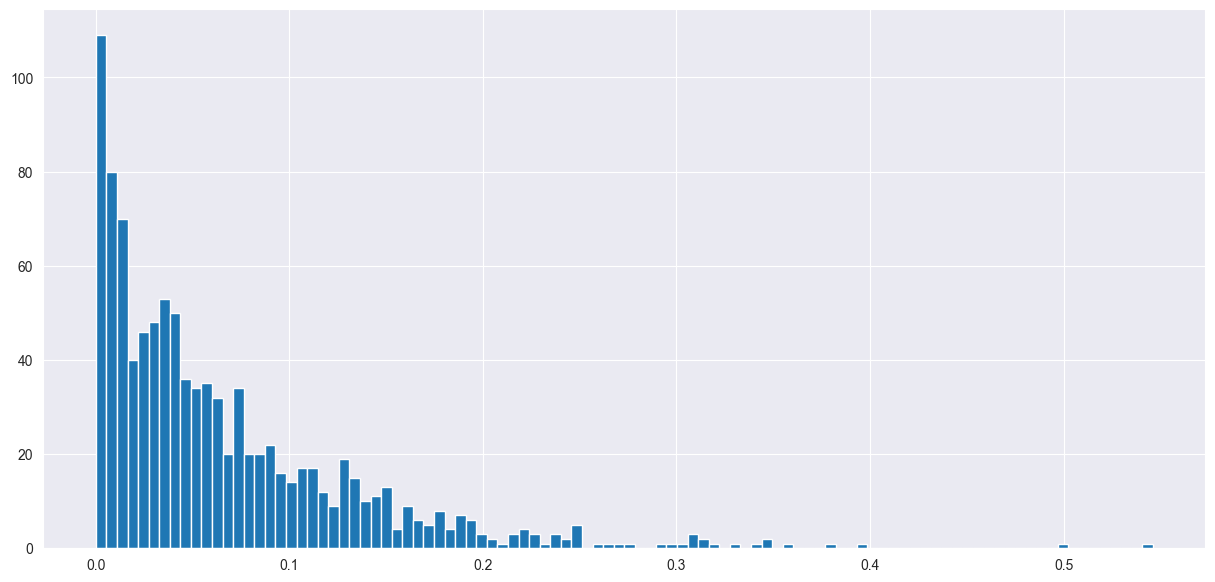

In [42]:
plt.hist(gamma.rvs(alpha,scale=beta,size=1000),bins=100)
plt.show()

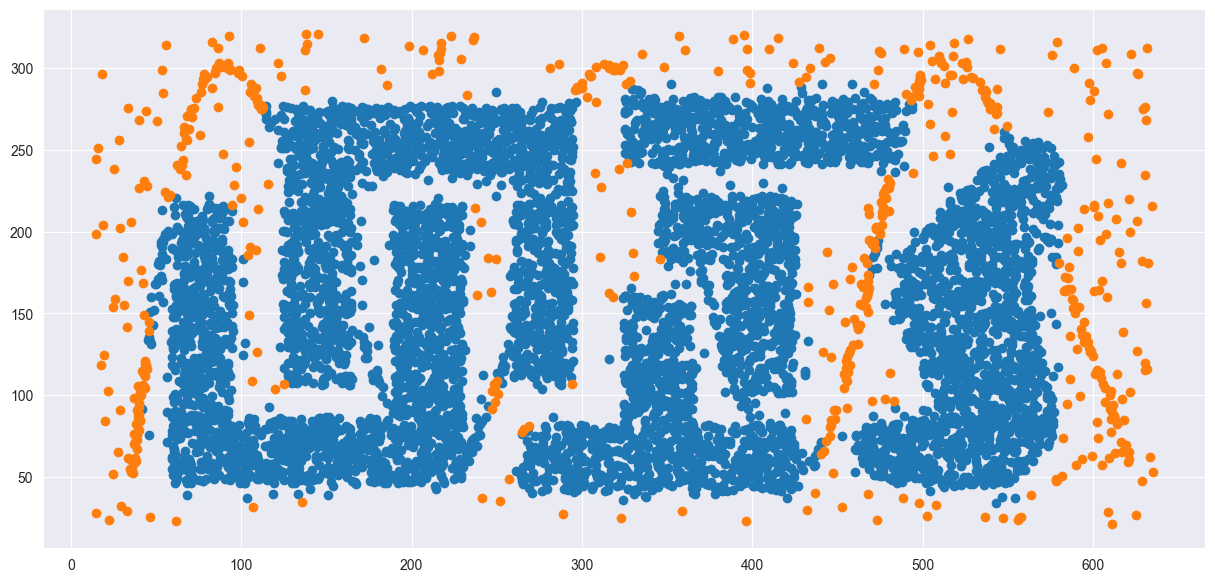

In [43]:
newValue = arr < perc
plt.scatter(X[newValue,0],X[newValue,1])
plt.scatter(X[~newValue,0],X[~newValue,1])
plt.show()

In [44]:
arff_file = arff.loadarff('./real/PenDigits_withoutdupl_norm_v10.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])

X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    alpha = pow(np.mean(arr),2) / np.var(arr)
    beta = np.var(arr) / np.mean(arr)
    posNeg4 = []
    spaceStep4 = np.linspace(.6,.99,20)
    for e in spaceStep4:
        newArr = arr > gamma.ppf(e,alpha,scale=beta)
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), (y[newArr] != 1).sum()/ ((y != 1).sum())])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2))
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots))+2,tots)
# skewness influences the linspace, aka the significance level

0.9457931034482758 12 [0.8208610579406314, 0.8648054884629219, 0.9149041173152848, 0.9197806283695853, 0.9315516273849608, 0.9428291864691081, 0.9418702611625948, 0.942714126807564, 0.943677526228603, 0.9450579790171176, 0.9457931034482758, 0.9456970030244708, 0.9450715859030837, 0.9273221025499401, 0.9287619573215598, 0.9338760648529815, 0.9381108381108382, 0.9391684901531728, 0.9401963457867466, 0.9390237251158986, 0.9393765381460213, 0.9387202625102543, 0.9383730484798685, 0.9377089613592766, 0.9370786516853933, 0.938019693654267, 0.9370786516853933, 0.9364757467799396, 0.9371717724288839, 0.9364783324190894, 0.9272776868521551, 0.9268046853718332, 0.9257625272331154, 0.925925925925926, 0.9260467645459489, 0.925960228820485, 0.9262326341596295, 0.926400217509516, 0.9258977149075082, 0.9250476449768583, 0.9311314533959119, 0.9308605571506169, 0.9304153726708072, 0.9299484116209612, 0.9301948051948052, 0.9169538783255238, 0.917359365938527, 0.9177864694264803, 0.9123446785521341, 0.91

In [60]:
arff_file = arff.loadarff('./real/Hepatitis_withoutdupl_norm_16.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])

X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,71):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    alpha = pow(np.mean(arr),2) / np.var(arr)
    beta = np.var(arr) / np.mean(arr)
    posNeg4 = []
    spaceStep4 = np.linspace(.2,.99,20)
    for e in spaceStep4:
        newArr = arr > gamma.ppf(e,alpha,scale=beta)
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), (y[newArr] != 1).sum()/ ((y != 1).sum())])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2))
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots))+2,tots)
# skewness influences the linspace, aka the significance level

0.6865793780687398 49 [0.4671985815602837, 0.5046153846153847, 0.5207100591715976, 0.5676638176638177, 0.5458579881656804, 0.5595776772247361, 0.5701357466063348, 0.5907692307692307, 0.5882352941176471, 0.598793363499246, 0.6146304675716441, 0.6048265460030166, 0.6130769230769231, 0.6200000000000001, 0.6484615384615384, 0.6369230769230769, 0.6392307692307694, 0.6438461538461538, 0.6415384615384617, 0.6507692307692309, 0.656923076923077, 0.6715384615384618, 0.6615384615384616, 0.6466346153846153, 0.6440261865793782, 0.6471571906354515, 0.6446488294314381, 0.6379598662207357, 0.647008547008547, 0.6546822742474917, 0.6538461538461539, 0.6435897435897436, 0.647008547008547, 0.6521367521367522, 0.6471571906354515, 0.6555183946488295, 0.6479933110367893, 0.6463210702341137, 0.6276223776223776, 0.6564102564102564, 0.6505016722408026, 0.6410256410256411, 0.6461538461538462, 0.6747491638795986, 0.6794871794871795, 0.681669394435352, 0.679214402618658, 0.6865793780687398, 0.6717948717948719, 0.6